# Creating final comparision graphs

### STEPS

- Load all data
    - ref
    - GPT
    - Gemini
- fuse into categories
    - calculate new averages for each category
        - from raw data vs avgs?
- create graphs
    - all in 1 ?
    - separate by "model" ?
        - have reference data in each?

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from dotenv import load_dotenv

# load_dotenv()

from config.configuration import DATA_FOLDER_PATH

In [115]:
ref = pd.read_csv(f"../../{DATA_FOLDER_PATH}/CES_modified_2005.csv")

# GPT
gpt4o_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/GPT-4o_averages.csv")
gpt4o_avg.set_index("#", inplace=True)
gpt4o_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/GPT-4o_raw_data.csv")
gpt4o_raw.set_index("#", inplace=True)

gpt4omini_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/GPT-4o-mini_averages.csv")
gpt4omini_avg.set_index("#", inplace=True)
gpt4omini_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/GPT-4o-mini_raw_data.csv")
gpt4omini_raw.set_index("#", inplace=True)

gpt35_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/GPT-3.5-turbo_averages.csv")
gpt35_avg.set_index("#", inplace=True)
gpt35_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/GPT-3.5-turbo_raw_data.csv")
gpt35_raw.set_index("#", inplace=True)

# Gemini
gemini_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/Gemini_averages.csv")
gemini_avg.set_index("#", inplace=True)
gemini_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/Gemini_raw_data.csv")
gemini_raw.set_index("#", inplace=True)

# Grok
grok_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/Grok_averages.csv")
grok_avg.set_index("#", inplace=True)
grok_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/Grok_raw_data.csv")
grok_raw.set_index("#", inplace=True)

In [116]:
slices = [slice(0, 5), slice(5, 11), slice(11, 16), slice(16, 21), slice(21, 23), slice(23, 27), slice(27, None)]
labels = ["Active", "Passive", "Questionable", "No Harm", "Downloading", "Recycling", "Doing Good"]

In [117]:
columns = ["GPT-4o", "GPT-4o-mini", "Gemini", "Grok", "Students", "Non-students"]
category_averages = pd.DataFrame(index=labels, columns=columns)
category_averages["GPT-4o"] = [gpt4o_avg.iloc[s, 0].mean() for s in slices]
category_averages["GPT-4o-mini"] = [gpt4omini_avg.iloc[s, 0].mean() for s in slices]
category_averages["GPT-3.5-turbo"] = [gpt35_avg.iloc[s, 0].mean() for s in slices]
category_averages["Gemini"] = [gemini_avg.iloc[s, 0].mean() for s in slices]
category_averages["Grok"] = [grok_avg.iloc[s, 0].mean() for s in slices]
category_averages["Students"] = [ref.iloc[s, 1].mean() for s in slices]
category_averages["Non-students"] = [ref.iloc[s, 2].mean() for s in slices]

category_errors = pd.DataFrame(index=labels, columns=columns)
category_errors["GPT-4o"] = [gpt4o_avg.iloc[s, 0].sem() for s in slices]
category_errors["GPT-4o-mini"] = [gpt4omini_avg.iloc[s, 0].sem() for s in slices]
category_errors["GPT-3.5-turbo"] = [gpt35_avg.iloc[s, 0].sem() for s in slices]
category_errors["Gemini"] = [gemini_avg.iloc[s, 0].sem() for s in slices]
# category_errors["Gemini"] = [gemini_raw.groupby("#")["Response"].std().iloc[s].mean() for s in slices]
category_errors["Grok"] = [grok_avg.iloc[s, 0].sem() for s in slices]
category_errors["Students"] = np.nan
category_errors["Non-students"] = np.nan

category_errors

,GPT-4o,GPT-4o-mini,Gemini,Grok,Students,Non-students
Active,0.002000,0.011662,0.000000,0.294934,NaN,NaN
Passive,0.139270,0.467609,0.442597,0.242342,NaN,NaN
Questionable,0.376558,0.285874,0.193907,0.234789,NaN,NaN
No Harm,0.743418,0.531541,0.562438,0.316038,NaN,NaN
Downloading,0.440000,0.335000,0.500000,0.030000,NaN,NaN
Recycling,0.246826,0.485976,0.559620,0.500000,NaN,NaN
Doing Good,0.246762,0.005000,0.000000,0.492500,NaN,NaN


In [118]:
print(f"{category_errors["GPT-4o"].iloc[0]}")
print(f"{category_errors.loc[labels[0], "GPT-4o"]}")
# print(f"{category_errors.loc[0, "GPT-4o"]}")
print(len(slices))

0.0020000000000000018
0.0020000000000000018
7


In [119]:
# convert std to sem 
n = [5, 6, 5, 5, 2, 4, 4]
for i in range(len(slices)):
    category_errors.loc[labels[i], "GPT-4o"] = category_errors.loc[labels[i], "GPT-4o"] / (n[i]**0.5)
    category_errors.loc[labels[i], "GPT-4o-mini"] = category_errors.loc[labels[i], "GPT-4o-mini"] / (n[i]**0.5)
    category_errors.loc[labels[i], "GPT-3.5-turbo"] = category_errors.loc[labels[i], "GPT-3.5-turbo"] / (n[i]**0.5)
    category_errors.loc[labels[i], "Gemini"] = category_errors.loc[labels[i], "Gemini"] / (n[i]**0.5)
    category_errors.loc[labels[i], "Grok"] = category_errors.loc[labels[i], "Grok"] / (n[i]**0.5)

In [120]:
category_errors

,GPT-4o,GPT-4o-mini,Gemini,Grok,Students,Non-students
Active,0.000894,0.005215,0.000000,0.131898,NaN,NaN
Passive,0.056857,0.190900,0.180689,0.098936,NaN,NaN
Questionable,0.168402,0.127847,0.086718,0.105001,NaN,NaN
No Harm,0.332467,0.237712,0.251530,0.141336,NaN,NaN
Downloading,0.311127,0.236881,0.353553,0.021213,NaN,NaN
Recycling,0.123413,0.242988,0.279810,0.250000,NaN,NaN
Doing Good,0.123381,0.002500,0.000000,0.246250,NaN,NaN


<Axes: title={'center': 'Average Responses per Category'}, xlabel='Category', ylabel='Avg Score'>

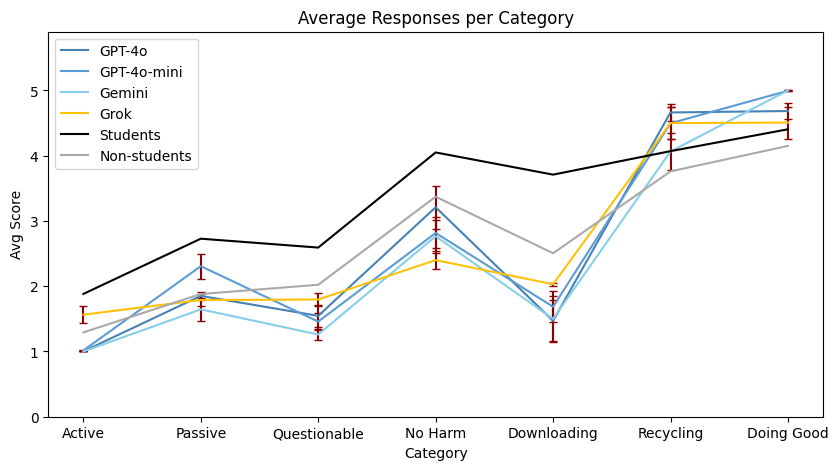

In [121]:
# create plot with error bars 
fig, ax = plt.subplots()
category_averages.plot(
    kind="line",
    ylim=(0, 5.9),
    sharex=False,
    sharey=True,
    yerr=category_errors,
    capsize=3,
    ecolor="darkred",
    color=["#4682b4", "#5a9bd4", "#87ceeb", "#FFC107", "#A9A9A9", "#989898"],
    ax=ax,
    title="Average Responses per Category",
    xlabel="Category",
    ylabel="Avg Score",
    figsize=(10, 5),
    rot=0,
)

# fig.savefig("category_averages.png")

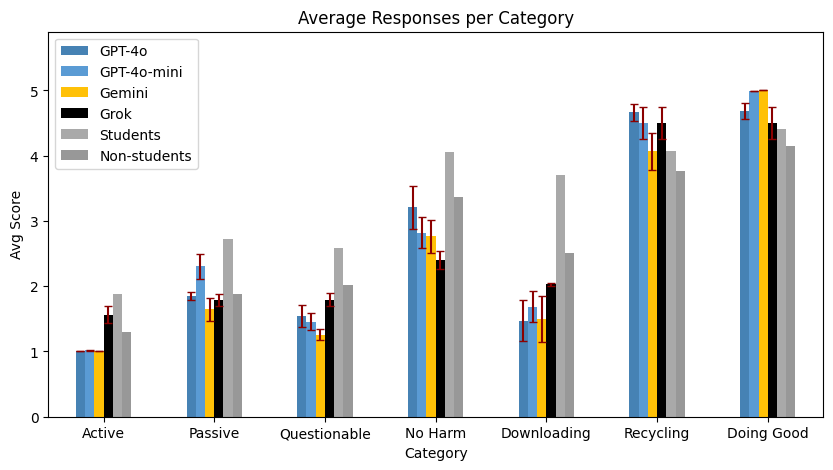

In [ ]:
# create plot with error bars 
fig, ax = plt.subplots()
category_averages.plot(
    kind="bar",
    ylim=(0, 5.9),
    yerr=category_errors,
    capsize=3,
    ecolor="darkred",
    color=["#4682b4", "#5a9bd4", "#87ceeb", "#FFC107", "#000000", "#A9A9A9", "#989898"],
    ax=ax,
    title="Average Responses per Category",
    xlabel="Category",
    ylabel="Avg Score",
    figsize=(10, 5),
    rot=0,
)

fig.savefig("category_averages.png")

### testing

In [123]:
category_averages = pd.DataFrame(index=labels, columns=["GPT-4o", "GPT-100"])
category_averages["GPT-4o"] = [gpt4o_avg.iloc[s, 0].mean() for s in slices]
category_averages["GPT-100"] = [gpt4omini_avg.iloc[s, 0].mean() for s in slices]

stacked = pd.DataFrame()
stacked["avg"] = category_averages.stack(future_stack=True)

category_averages["GPT-4o"] = [gpt4o_avg.iloc[s, 1].mean() for s in slices]
category_averages["GPT-100"] = [gpt4omini_avg.iloc[s, 1].mean() for s in slices]

stacked["std"] = category_averages.stack(future_stack=True)

stacked.head()

avg       std
Active       GPT-4o   1.002000  0.020000
             GPT-100  1.016000  0.075878
Passive      GPT-4o   1.851667  0.285380
             GPT-100  2.306667  0.270420
Questionable GPT-4o   1.546000  0.191739

In [124]:
print(stacked["avg"].unstack())

                GPT-4o   GPT-100
Active        1.002000  1.016000
Passive       1.851667  2.306667
Questionable  1.546000  1.458000
No Harm       3.210000  2.816000
Recycling     4.662500  4.497500
Doing Good    4.685000  4.995000


In [125]:
active = pd.DataFrame()
active = gpt4o_avg.iloc[slices[0], 0]
print(active)

#
1    1.01
2    1.00
3    1.00
4    1.00
5    1.00
Name: Average, dtype: float64


In [126]:
# get category averages
active.mean()

1.002

In [127]:
active_raw = pd.DataFrame()
active_raw = gpt4o_raw[gpt4o_raw.index.isin(range(slices[0].start, slices[0].stop + 1))]
print(active_raw)

                                             Question  Iteration  Response
#                                                                         
1   Returning damaged goods when the damage was yo...          0         1
1   Returning damaged goods when the damage was yo...          1         1
1   Returning damaged goods when the damage was yo...          2         1
1   Returning damaged goods when the damage was yo...          3         1
1   Returning damaged goods when the damage was yo...          4         1
..                                                ...        ...       ...
5   Reporting a lost item as "stolen" to an insura...         95         1
5   Reporting a lost item as "stolen" to an insura...         96         1
5   Reporting a lost item as "stolen" to an insura...         97         1
5   Reporting a lost item as "stolen" to an insura...         98         1
5   Reporting a lost item as "stolen" to an insura...         99         1

[500 rows x 3 columns]


In [128]:
active_raw["Answers"].mean()

KeyError: 'Answers'

In [ ]:
gpt4o_raw.head()

In [ ]:
sl = slices[0]
number = 5
print(sl)
print(number in range(sl.start, sl.stop + 1))
print(sl.start)
print(sl.stop)